<a href="https://colab.research.google.com/github/vinaybist/tensorflow-js-prj/blob/main/extracellular_classification_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracellular-Classification (Grid Search)

## Import & download required libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras import Sequential
import pandas as pd
import numpy as np
from matplotlib import  pyplot as plt
# GPU check
from tensorflow.python.client import device_lib


In [ ]:
#CONSTANT USED
INPUT_DATA_DIR = "./drive/MyDrive/DNN/data/all/"
TRAIN_DATA_COEFFICIENT = 0.8
BATCH = 5000
LABEL = "tCompound" # should match with the compound label
TFD_EPOCHS = 1
TFD_PARELLEL_READ = 5
TFD_SHUFFLE_BUFFER_SIZE = 10000

# Hyper-parameters for training process
EPOCHS = 100
OPTIMIZER = Adamax(learning_rate=0.001)
VERBOSE_FLAG = 1

In [ ]:
# mount the google drive for reading data csv files
# not needed once script runs on local system where data reside on the local
from google.colab import drive
drive.mount('/content/drive')
!ls drive/MyDrive/DNN/data/train/

TRAIN_FILE = "./drive/MyDrive/DNN/data/train/cvtrace8.csv"
VALIDATION_FILE = "./drive/MyDrive/DNN/data/train/cvtrace8.csv"

In [ ]:
import os

files = []

for (dirpath, dirnames, filenames) in os.walk(INPUT_DATA_DIR):
    files.extend(os.path.join(dirpath, f) for f in filenames)
    break

train_files_endIdx = int(len(files) * TRAIN_DATA_COEFFICIENT)
train_files = files[0:train_files_endIdx]
validation_files = files[train_files_endIdx:len(files)]
print("Total",len(files), "are found under ==>"+ INPUT_DATA_DIR)
print("Test Train split",TRAIN_DATA_COEFFICIENT, "==>", (len(train_files),len(validation_files)))

train_files_endIdx, train_files, validation_files


Total 32 are found under ==>./drive/MyDrive/DNN/data/all/
Test Train split 0.8 ==> (25, 7)


(25,
 ['./drive/MyDrive/DNN/data/all/cvtrace15.csv',
  './drive/MyDrive/DNN/data/all/cvtrace16.csv',
  './drive/MyDrive/DNN/data/all/cvtrace18.csv',
  './drive/MyDrive/DNN/data/all/cvtrace19.csv',
  './drive/MyDrive/DNN/data/all/cvtrace1.csv',
  './drive/MyDrive/DNN/data/all/cvtrace22.csv',
  './drive/MyDrive/DNN/data/all/cvtrace24.csv',
  './drive/MyDrive/DNN/data/all/cvtrace27.csv',
  './drive/MyDrive/DNN/data/all/cvtrace28.csv',
  './drive/MyDrive/DNN/data/all/cvtrace2.csv',
  './drive/MyDrive/DNN/data/all/cvtrace30.csv',
  './drive/MyDrive/DNN/data/all/cvtrace32.csv',
  './drive/MyDrive/DNN/data/all/cvtrace33.csv',
  './drive/MyDrive/DNN/data/all/cvtrace34.csv',
  './drive/MyDrive/DNN/data/all/cvtrace35.csv',
  './drive/MyDrive/DNN/data/all/cvtrace37.csv',
  './drive/MyDrive/DNN/data/all/cvtrace39.csv',
  './drive/MyDrive/DNN/data/all/cvtrace40.csv',
  './drive/MyDrive/DNN/data/all/cvtrace4.csv',
  './drive/MyDrive/DNN/data/all/cvtrace5.csv',
  './drive/MyDrive/DNN/data/all/cvtrace

In [ ]:
# Load data using 'tf.data.Dataset'
def createDataSet(files):
  dataset = tf.data.experimental.make_csv_dataset(
    file_pattern = files,
    header=True,
    batch_size=BATCH, num_epochs=TFD_EPOCHS,
    label_name=LABEL,
    num_parallel_reads=TFD_PARELLEL_READ,
    ignore_errors=True,
    shuffle_buffer_size=TFD_SHUFFLE_BUFFER_SIZE
  )
  return dataset



In [ ]:
#train data
train_cve_ds = createDataSet(train_files)
#test data
validation_cve_ds = createDataSet(validation_files)

print(train_cve_ds)

<PrefetchDataset shapes: (OrderedDict([(t1, (None,)), (t2, (None,)), (t3, (None,)), (t4, (None,)), (t5, (None,)), (t6, (None,)), (t7, (None,)), (t8, (None,)), (t9, (None,)), (t10, (None,)), (t11, (None,)), (t12, (None,)), (t13, (None,)), (t14, (None,)), (t15, (None,)), (t16, (None,)), (t17, (None,)), (t18, (None,)), (t19, (None,)), (t20, (None,)), (t21, (None,)), (t22, (None,)), (t23, (None,)), (t24, (None,)), (t25, (None,)), (t26, (None,)), (t27, (None,)), (t28, (None,)), (t29, (None,)), (t30, (None,)), (t31, (None,)), (t32, (None,)), (t33, (None,)), (t34, (None,)), (t35, (None,)), (t36, (None,)), (t37, (None,)), (t38, (None,)), (t39, (None,)), (t40, (None,)), (t41, (None,)), (t42, (None,)), (t43, (None,)), (t44, (None,)), (t45, (None,)), (t46, (None,)), (t47, (None,)), (t48, (None,)), (t49, (None,)), (t50, (None,)), (t51, (None,)), (t52, (None,)), (t53, (None,)), (t54, (None,)), (t55, (None,)), (t56, (None,)), (t57, (None,)), (t58, (None,)), (t59, (None,)), (t60, (None,)), (t61, (Non

In [ ]:
# check dataset 
print("tf.data.Dataset type is:",train_cve_ds,"\n")
for batch in train_cve_ds.take(1):
  print("The datset type is :",type(batch),"\n")

#see batch size
#for batch, label in train_cve_ds.take(1):
  #counter is just to restrict up to 2 features ... not the all
#  count = 0;
#  print("batch size is ==> ",batch_size,"\n")
#  for key, value in batch.items():
#    print(f"{key:5s}: {value}");
#    count = count +1;
#    if (count == 2):
#      break
#  print()
#  print(f"{'label':5s}: {label}")

tf.data.Dataset type is: <PrefetchDataset shapes: (OrderedDict([(t1, (None,)), (t2, (None,)), (t3, (None,)), (t4, (None,)), (t5, (None,)), (t6, (None,)), (t7, (None,)), (t8, (None,)), (t9, (None,)), (t10, (None,)), (t11, (None,)), (t12, (None,)), (t13, (None,)), (t14, (None,)), (t15, (None,)), (t16, (None,)), (t17, (None,)), (t18, (None,)), (t19, (None,)), (t20, (None,)), (t21, (None,)), (t22, (None,)), (t23, (None,)), (t24, (None,)), (t25, (None,)), (t26, (None,)), (t27, (None,)), (t28, (None,)), (t29, (None,)), (t30, (None,)), (t31, (None,)), (t32, (None,)), (t33, (None,)), (t34, (None,)), (t35, (None,)), (t36, (None,)), (t37, (None,)), (t38, (None,)), (t39, (None,)), (t40, (None,)), (t41, (None,)), (t42, (None,)), (t43, (None,)), (t44, (None,)), (t45, (None,)), (t46, (None,)), (t47, (None,)), (t48, (None,)), (t49, (None,)), (t50, (None,)), (t51, (None,)), (t52, (None,)), (t53, (None,)), (t54, (None,)), (t55, (None,)), (t56, (None,)), (t57, (None,)), (t58, (None,)), (t59, (None,)), (

## Preprocessing 

Normalization of dataset

In [ ]:
# Normalize the dataset i.e. transforming items in a dataset between (0,1)
#train_dataset = dataset.shuffle(20000).batch(10000)

In [ ]:
# API "make_csv_dataset" will return a tf.data.Dataset that features are a dictionary for for training labels and feature extraction - should be hndle by keras automatically but not
def features_and_labels(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

train_cve_ds = train_cve_ds.map(features_and_labels)
validation_cve_ds = validation_cve_ds.map(features_and_labels)

print("For training the proper dataset ==> ", train_cve_ds)
validation_cve_ds


<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
For training the proper dataset ==>  <MapDataset shapes: ((None, 1024), (None,)), types: (tf.float32, tf.int32)>


<MapDataset shapes: ((None, 1024), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
train_labels = [targ.numpy() for feat, targ in train_cve_ds ]
len(train_labels)

## Neural Network Architecure

In [ ]:
#DNN model architecture
#input_shape is required and should be eual to the features

model = keras.Sequential()
model.add(keras.layers.Dense(20, input_shape=(1024,),activation='relu'))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax'))

#compile
model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                20500     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              21000     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               400400    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 404       
Total params: 482,404
Trainable params: 482,404
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit
history = model.fit(train_cve_ds, epochs=EPOCHS,verbose=VERBOSE_FLAG, validation_data=(validation_cve_ds))



Epoch 1/10
100/100 [==============================] - 973s 10s/step - loss: 0.5037 - accuracy: 0.8076 - val_loss: 0.2318 - val_accuracy: 0.9157
Epoch 2/10
100/100 [==============================] - 929s 9s/step - loss: 0.2184 - accuracy: 0.9195 - val_loss: 0.2122 - val_accuracy: 0.9207
Epoch 3/10
100/100 [==============================] - 887s 9s/step - loss: 0.2011 - accuracy: 0.9248 - val_loss: 0.1973 - val_accuracy: 0.9246
Epoch 4/10
100/100 [==============================] - 925s 9s/step - loss: 0.1845 - accuracy: 0.9312 - val_loss: 0.1862 - val_accuracy: 0.9289
Epoch 5/10
100/100 [==============================] - 882s 9s/step - loss: 0.1749 - accuracy: 0.9341 - val_loss: 0.1684 - val_accuracy: 0.9363
Epoch 6/10
100/100 [==============================] - 875s 9s/step - loss: 0.1693 - accuracy: 0.9357 - val_loss: 0.1662 - val_accuracy: 0.9373
Epoch 7/10
100/100 [==============================] - 953s 10s/step - loss: 0.1615 - accuracy: 0.9384 - val_loss: 0.1552 - val_accuracy: 0.94

## Evaluate the model (Visualization)

### Loss & Accuracy

In [ ]:
## dataset should generate at least ==> (steps_per_epoch * epochs batches) ==> 2*10 
# ## Evaluate the model (Visualization)
loss, accuracy = model.evaluate(train_cve_ds)
test_loss, test_accuracy = model.evaluate(validation_cve_ds)
print("Loss :", loss)
print("Accuracy :", accuracy)
print(history.history.keys())

4/4 [==============================] - 23s 5s/step - loss: 0.3128 - accuracy: 0.8917
Loss : 0.31282147765159607
Accuracy : 0.8917499780654907
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plots

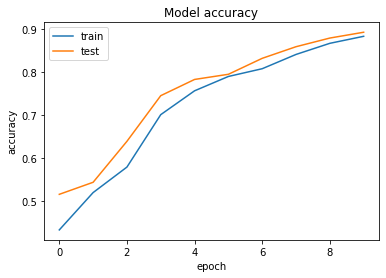

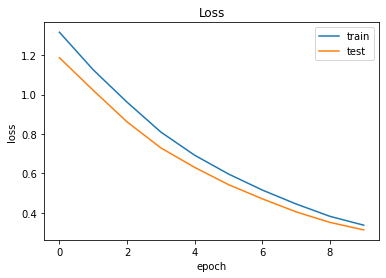

In [ ]:
# accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


## Predictions on Test DataSet

In [ ]:
#predictions
predictions = model.predict(validation_cve_ds, steps = 10)
print(predictions.shape)
#need only labels
pred_class = np.argmax(predictions, axis=-1)
print(pred_class)



(20000, 4)
[3 1 3 ... 3 1 2]


## Confusion Matrix

In [ ]:
# Print confusion matrix
# all validation labels values
labels = [targ.numpy() for feat, targ in validation_cve_ds ]
#y_test = np.concatenate((labels[0], labels[1]))
#labels = np.reshape(labels, (18,))
#labels.shape
print(labels)

# Compound genres
dict_new_genres = {'UnKnown':0, 'Red':1, 'Blue':2, 'Green':3 }
reverse_new_map = {v: k for k, v in dict_new_genres.items()}

[array([3, 1, 3, ..., 3, 3, 0], dtype=int32), array([3, 3, 1, ..., 3, 3, 1], dtype=int32), array([3, 3, 3, ..., 2, 3, 0], dtype=int32), array([2, 1, 3, ..., 3, 2, 2], dtype=int32)]


In [ ]:
print(len(labels)) # lets say 20k total records and each batch is of 5k then it made the length ==> 4
cm_labels = np.reshape(labels, pred_class.shape)
cm_labels

4


array([3, 1, 3, ..., 3, 2, 2], dtype=int32)

In [ ]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=cm_labels, predictions=pred_class)
# Printing the result
print('Confusion_matrix: \n', "\n",cm, reverse_new_map)

Confusion_matrix: 
 
 tf.Tensor(
[[2127  199  105   11]
 [ 210 3056   10  330]
 [ 164   47 2842  570]
 [   0  393  126 9810]], shape=(4, 4), dtype=int32) {0: 'UnKnown', 1: 'Red', 2: 'Blue', 3: 'Green'}


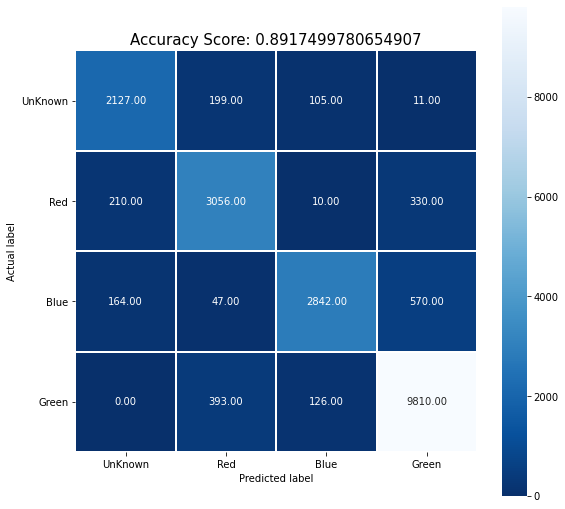

In [ ]:
import seaborn as sn
plt.figure(figsize=(9,9))
sn.heatmap(cm, annot=True, fmt=".2f", linewidths=.9, square = True, cmap = 'Blues_r',xticklabels=dict_new_genres.keys(),
            yticklabels=dict_new_genres.keys());
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.yticks(rotation=0) 
all_title = 'Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_title, size = 15);

## Save the model

In [ ]:
#Save the model
model.save("cve_model.h5")

#Save for Tensorflow.js
# get_ipython().system('pip install tensorflowjs')
# get_ipython().system("tensorflowjs_converter --input_format keras './content/model.h5' './content/model'")